In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
#email_opened_table.csv
#link_clicked_table.csv
#email_table.csv
open = pd. read_csv('email_opened_table.csv')
click = pd. read_csv('link_clicked_table.csv')
email = pd. read_csv('email_table.csv')

In [280]:
open 

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034
...,...
10340,990213
10341,918210
10342,200299
10343,211104


In [281]:
open['opened'] = 1

In [282]:
click

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561
...,...
2114,873162
2115,435454
2116,206772
2117,742967


In [283]:
click["clicked"] = 1

In [284]:
df1= pd.merge(open, click, on = 'email_id', how = 'outer')
df= pd.merge(df1, email, on = 'email_id', how = 'outer')

In [285]:
df

,email_id,opened,clicked,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,8,NaN,NaN,short_email,generic,9,Thursday,US,3
1,33,NaN,NaN,long_email,personalized,6,Monday,US,0
2,46,NaN,NaN,short_email,generic,14,Tuesday,US,3
3,49,1.0,NaN,long_email,personalized,11,Thursday,US,10
4,65,NaN,NaN,short_email,generic,8,Wednesday,UK,3
...,...,...,...,...,...,...,...,...,...
99995,999969,NaN,NaN,short_email,generic,21,Thursday,US,0
99996,999972,NaN,NaN,long_email,personalized,6,Tuesday,US,5
99997,999976,NaN,NaN,long_email,personalized,5,Wednesday,UK,0
99998,999980,NaN,NaN,long_email,generic,10,Thursday,FR,4


Replacing NaN values with 0

In [286]:
df['opened'] = df['opened'].fillna(0).astype(int)
df['clicked'] = df['clicked'].fillna(0).astype(int)
df

,email_id,opened,clicked,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,8,0,0,short_email,generic,9,Thursday,US,3
1,33,0,0,long_email,personalized,6,Monday,US,0
2,46,0,0,short_email,generic,14,Tuesday,US,3
3,49,1,0,long_email,personalized,11,Thursday,US,10
4,65,0,0,short_email,generic,8,Wednesday,UK,3
...,...,...,...,...,...,...,...,...,...
99995,999969,0,0,short_email,generic,21,Thursday,US,0
99996,999972,0,0,long_email,personalized,6,Tuesday,US,5
99997,999976,0,0,long_email,personalized,5,Wednesday,UK,0
99998,999980,0,0,long_email,generic,10,Thursday,FR,4


Removing Anomaly (rows where link is clicked but email is not opened)

In [287]:
((df['opened'] == 0) & (df['clicked'] == 1)).sum()

np.int64(50)

In [288]:
anomaly = (df['opened'] == 0) & (df['clicked'] == 1)
df = df[~anomaly]

In [289]:
anomaly.sum()

np.int64(50)

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99950 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   email_id             99950 non-null  int64 
 1   opened               99950 non-null  int64 
 2   clicked              99950 non-null  int64 
 3   email_text           99950 non-null  object
 4   email_version        99950 non-null  object
 5   hour                 99950 non-null  int64 
 6   weekday              99950 non-null  object
 7   user_country         99950 non-null  object
 8   user_past_purchases  99950 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 7.6+ MB


In [291]:
def engagement(row):
    if (row['opened'] == 1) and (row['clicked'] == 1):
        return 'both'
    elif (row['opened'] == 1) and (row['clicked'] == 0):
        return 'opened'
    elif (row['opened'] == 0) and (row['clicked'] == 1):
        return 'clicked-->outlier' 
    elif (row['opened'] == 0) and (row['clicked'] == 0):
        return 'none'
    else:
        return 'unknown' 

In [292]:
df['target_col'] = df.apply(engagement, axis=1)

C:\Users\iaman\AppData\Local\Temp\ipykernel_13884\3557185324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_col'] = df.apply(engagement, axis=1)


In [293]:
df['target_col'].value_counts()

target_col
none      89605
opened     8276
both       2069
Name: count, dtype: int64

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99950 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   email_id             99950 non-null  int64 
 1   opened               99950 non-null  int64 
 2   clicked              99950 non-null  int64 
 3   email_text           99950 non-null  object
 4   email_version        99950 non-null  object
 5   hour                 99950 non-null  int64 
 6   weekday              99950 non-null  object
 7   user_country         99950 non-null  object
 8   user_past_purchases  99950 non-null  int64 
 9   target_col           99950 non-null  object
dtypes: int64(5), object(5)
memory usage: 8.4+ MB


Visulazations

In [295]:
df.sample(10)


,email_id,opened,clicked,email_text,email_version,hour,weekday,user_country,user_past_purchases,target_col
68410,683143,0,0,long_email,personalized,9,Saturday,US,5,none
13286,131066,0,0,long_email,generic,19,Tuesday,US,0,none
46332,461389,0,0,short_email,personalized,9,Saturday,US,1,none
57675,575889,0,0,long_email,personalized,16,Saturday,UK,3,none
17761,175372,0,0,long_email,personalized,5,Friday,ES,1,none
12528,124002,0,0,short_email,personalized,11,Tuesday,US,3,none
97497,975562,0,0,long_email,generic,6,Monday,US,0,none
90713,906715,0,0,long_email,personalized,13,Sunday,UK,9,none
34398,341724,0,0,short_email,generic,1,Monday,US,2,none
53357,532234,0,0,short_email,personalized,10,Tuesday,UK,5,none


In [296]:
'''num_col = [ 'opened', 'clicked', 'hour' , 'user_past_purchases']
sns.pairplot(df[num_col], hue = 'clicked', diag_kind = 'kde')
plt.suptitle('Email Engagement Analysis')
plt.show()'''

"num_col = [ 'opened', 'clicked', 'hour' , 'user_past_purchases']\nsns.pairplot(df[num_col], hue = 'clicked', diag_kind = 'kde')\nplt.suptitle('Email Engagement Analysis')\nplt.show()"

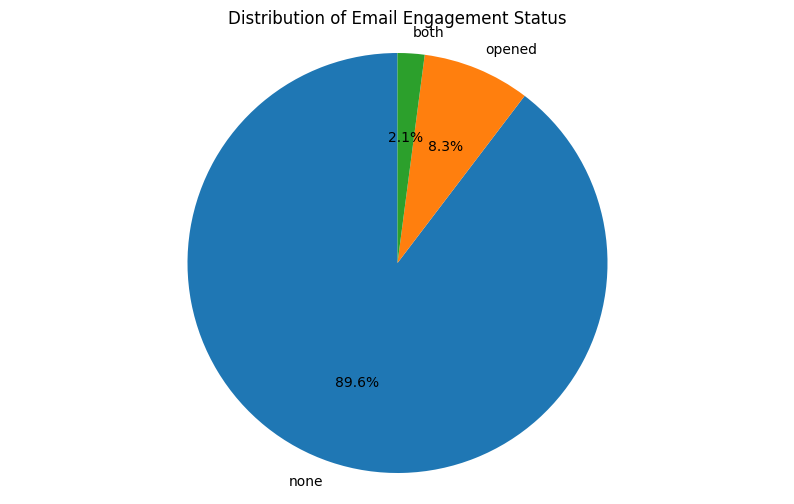

In [297]:
plt.figure(figsize=(10, 6))
engagement_counts = df['target_col'].value_counts()
plt.pie(engagement_counts.values, labels=engagement_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Email Engagement Status')
plt.axis('equal')
plt.show()

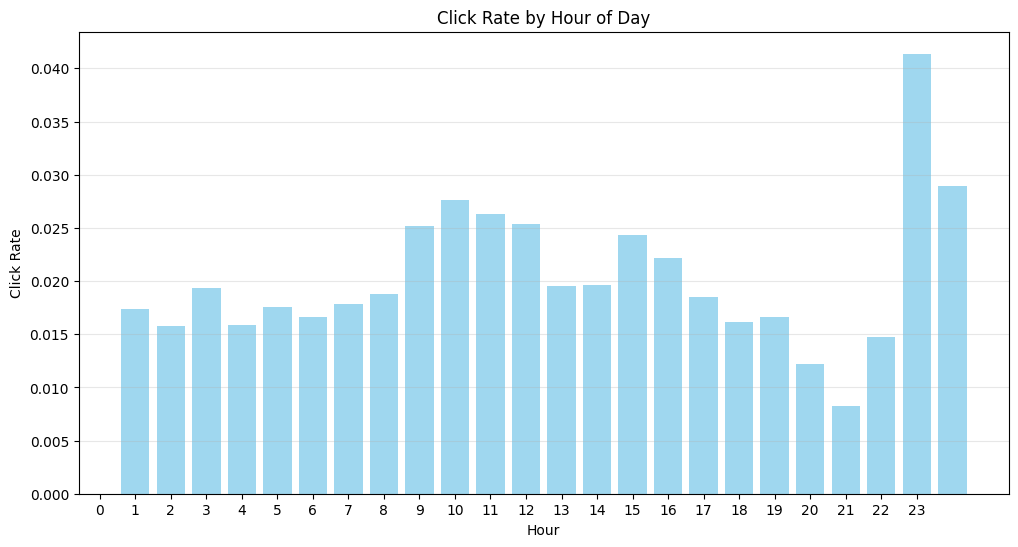

In [298]:
plt.figure(figsize=(12, 6))
hourly_click_rate = df.groupby('hour')['clicked'].mean()
plt.bar(hourly_click_rate.index, hourly_click_rate.values, color='skyblue', alpha=0.8)
plt.title('Click Rate by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Click Rate')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.show()

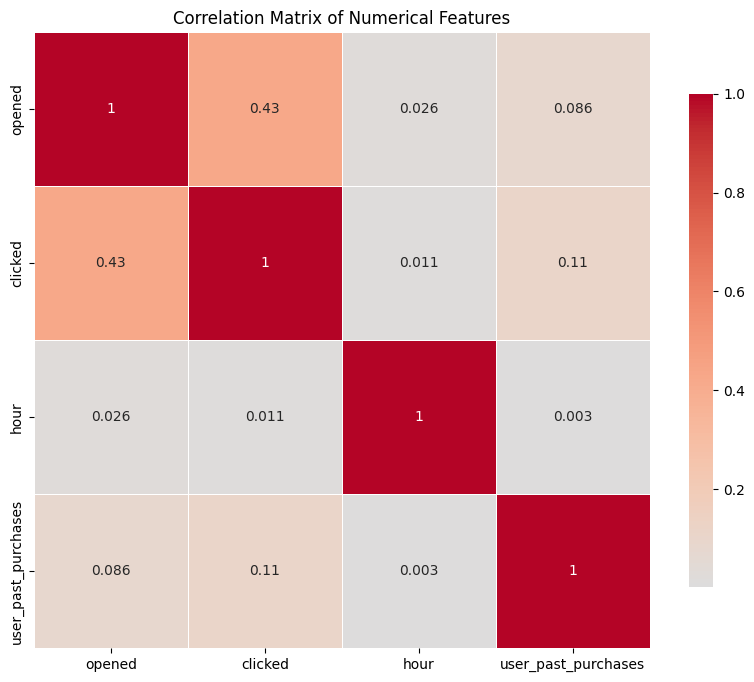

In [299]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[num_col].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

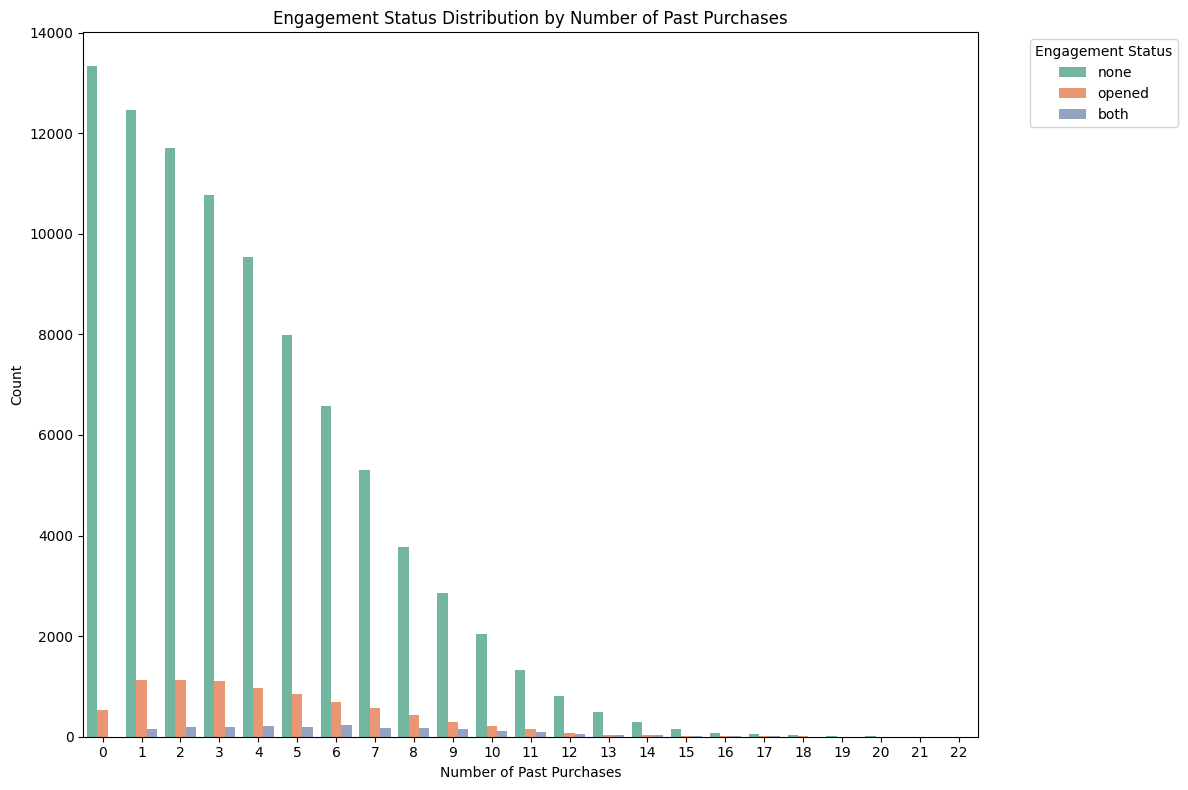

In [300]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='user_past_purchases', hue='target_col', palette='Set2')
plt.title('Engagement Status Distribution by Number of Past Purchases')
plt.xlabel('Number of Past Purchases')
plt.ylabel('Count')
plt.legend(title='Engagement Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\iaman\AppData\Local\Temp\ipykernel_13884\1088451798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='clicked', y='user_past_purchases', palette='viridis')


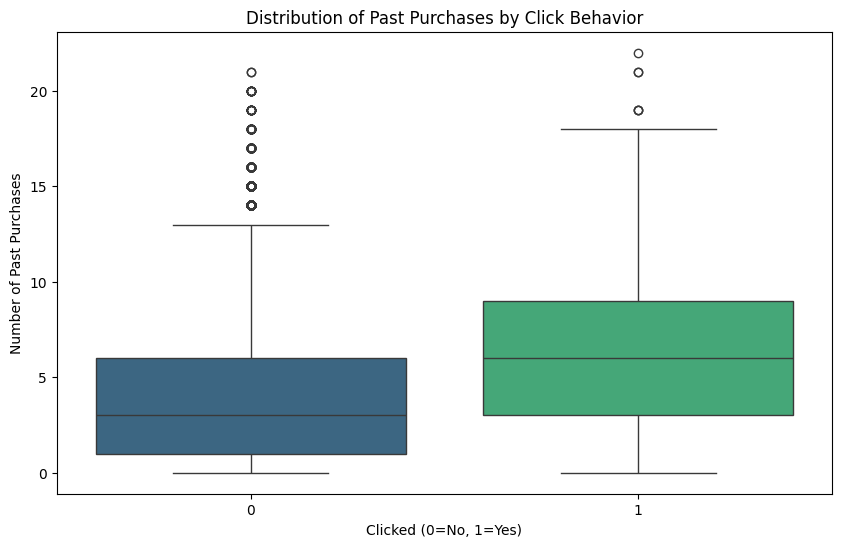

In [301]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='clicked', y='user_past_purchases', palette='viridis')
plt.title('Distribution of Past Purchases by Click Behavior')
plt.xlabel('Clicked (0=No, 1=Yes)')
plt.ylabel('Number of Past Purchases')
plt.show()

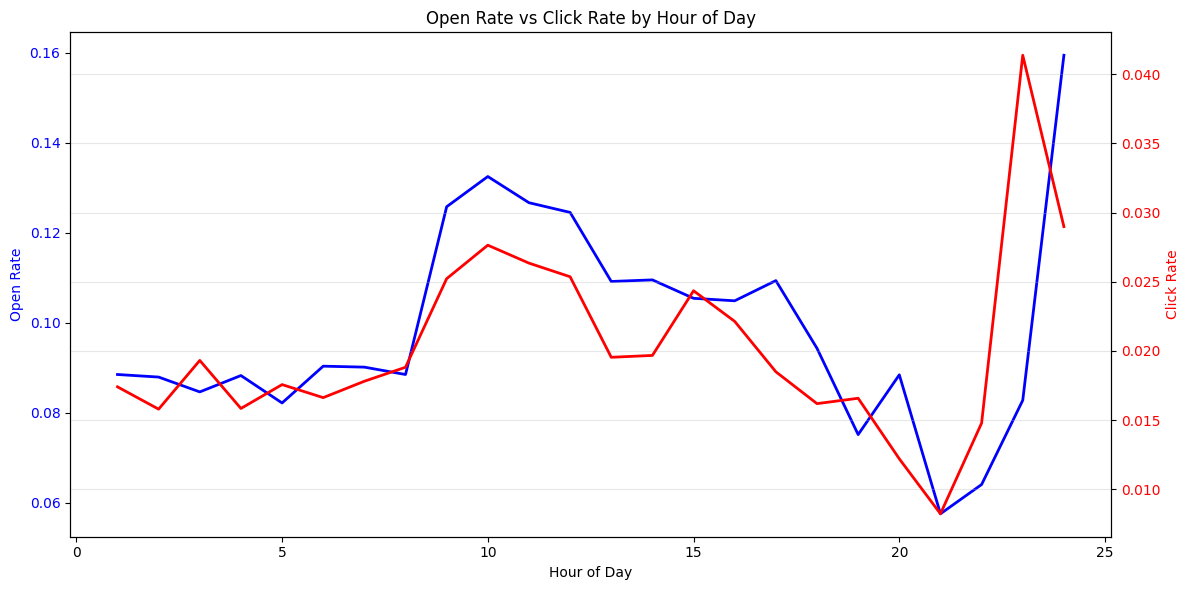

In [302]:
fig, ax1 = plt.subplots(figsize=(12, 6))
hourly_open_rate = df.groupby('hour')['opened'].mean()
hourly_click_rate = df.groupby('hour')['clicked'].mean()

ax1.plot(hourly_open_rate.index, hourly_open_rate.values, 'b-', label='Open Rate', linewidth=2)
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Open Rate', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(hourly_click_rate.index, hourly_click_rate.values, 'r-', label='Click Rate', linewidth=2)
ax2.set_ylabel('Click Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Open Rate vs Click Rate by Hour of Day')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [303]:
def get_engagement_status2(row):
    if row['clicked'] == 1 and row['opened'] == 1:
        return "2"
    elif row['opened'] == 1 and row['clicked'] == 0:
        return "1"
    elif row['opened'] == 0 and row['clicked'] == 0:
        return "0"
    else:
       
        return "Anomaly"

In [304]:
df['engagement_status2'] = df.apply(get_engagement_status2, axis=1)

print(df['engagement_status2'].value_counts())

engagement_status2
0    89605
1     8276
2     2069
Name: count, dtype: int64


C:\Users\iaman\AppData\Local\Temp\ipykernel_13884\1387133213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engagement_status2'] = df.apply(get_engagement_status2, axis=1)


Correlation Matrix:
                         hour  user_past_purchases  engagement_status2
hour                 1.000000             0.003038            0.024426
user_past_purchases  0.003038             1.000000            0.106843
engagement_status2   0.024426             0.106843            1.000000

Correlation with Engagement Status (sorted by absolute value):
user_past_purchases    0.106843
hour                   0.024426
Name: engagement_status2, dtype: float64



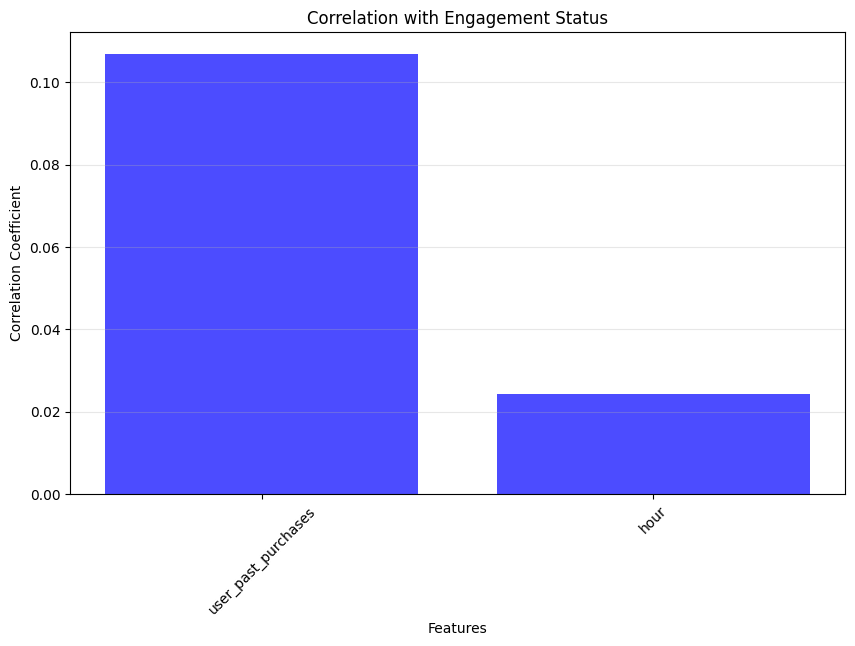

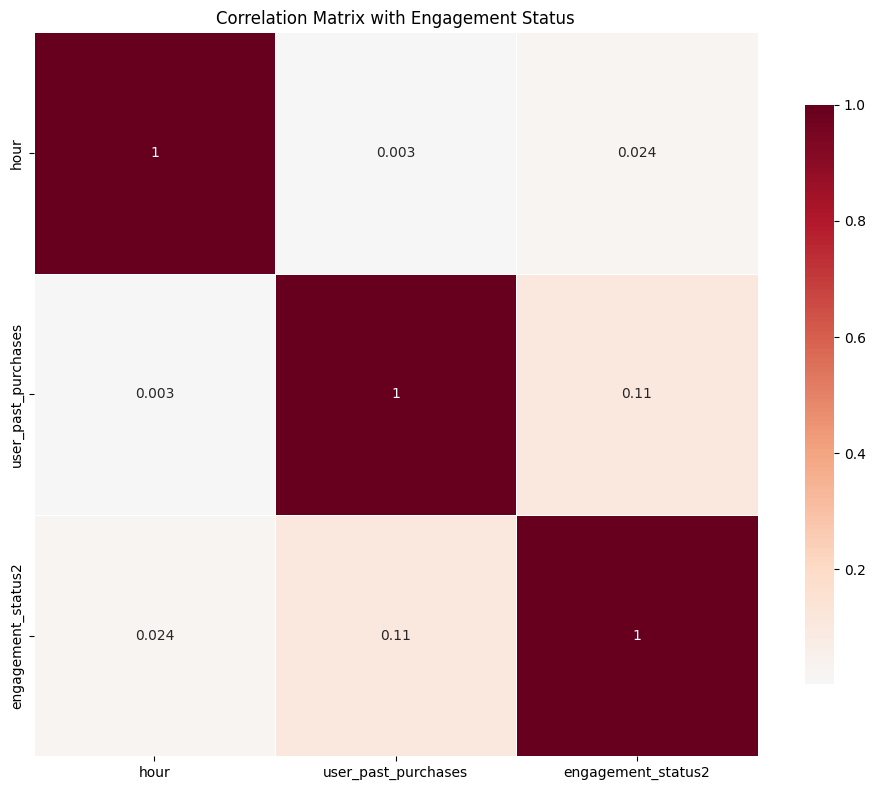

In [305]:
correlation_columns = ['hour', 'user_past_purchases', 'engagement_status2']
correlation_matrix = df[correlation_columns].corr()

print("Correlation Matrix:")
print(correlation_matrix)
print()


engagement_correlations = correlation_matrix['engagement_status2'].drop('engagement_status2').sort_values(key=abs, ascending=False)
print("Correlation with Engagement Status (sorted by absolute value):")
print(engagement_correlations)
print()

plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'blue' for x in engagement_correlations.values]
bars = plt.bar(engagement_correlations.index, engagement_correlations.values, color=colors, alpha=0.7)
plt.title('Correlation with Engagement Status')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix with Engagement Status')
plt.tight_layout()
plt.show()

In [306]:
from scipy.stats import chi2_contingency

# Calculate contingency table for user_country vs clicked
contingency_table_user_country = pd.crosstab(df['user_country'], df['engagement_status2'])
chi2_country, p_country, dof_country, expected_country = chi2_contingency(contingency_table_user_country)

print(f"User Country vs Clicked: Chi2 = {chi2_country}, p-value = {p_country}")

User Country vs Clicked: Chi2 = 1087.7303634088657, p-value = 9.416776570790791e-232


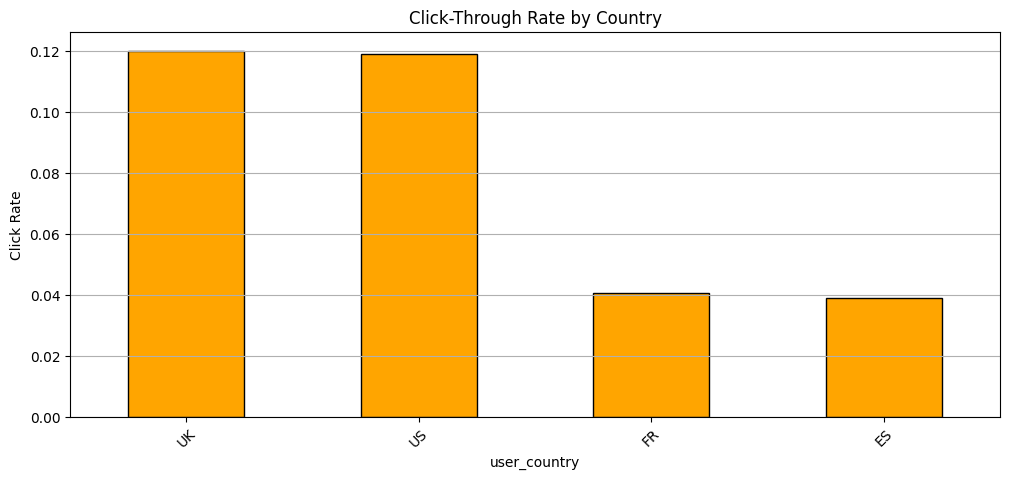

In [307]:
df.groupby('user_country')['opened'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,5), color='orange', edgecolor='black')
plt.title("Click-Through Rate by Country")
plt.ylabel("Click Rate")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [308]:

# Calculate contingency table for email_text vs clicked
contingency_table_email_text = pd.crosstab(df['email_text'], df['opened'])
chi2_text, p_text, dof_text, expected_text = chi2_contingency(contingency_table_email_text)

print(f"Email Text vs Clicked: Chi2 = {chi2_text}, p-value = {p_text}")

Email Text vs Clicked: Chi2 = 163.80052942745016, p-value = 1.6723890503369952e-37


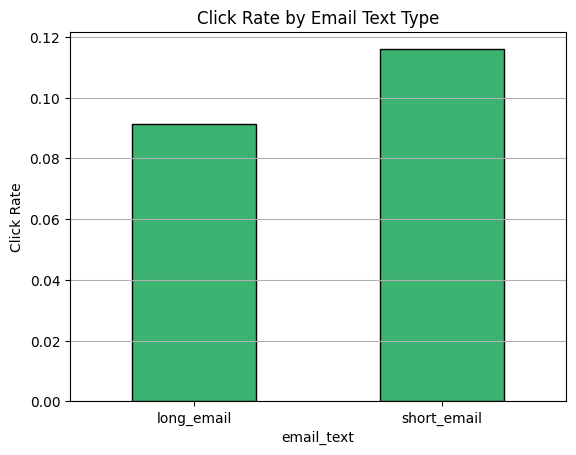

In [309]:

df.groupby('email_text')['opened'].mean().plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title("Click Rate by Email Text Type")
plt.ylabel("Click Rate")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Chi² = 353.52, p-value = 1.8881e-15


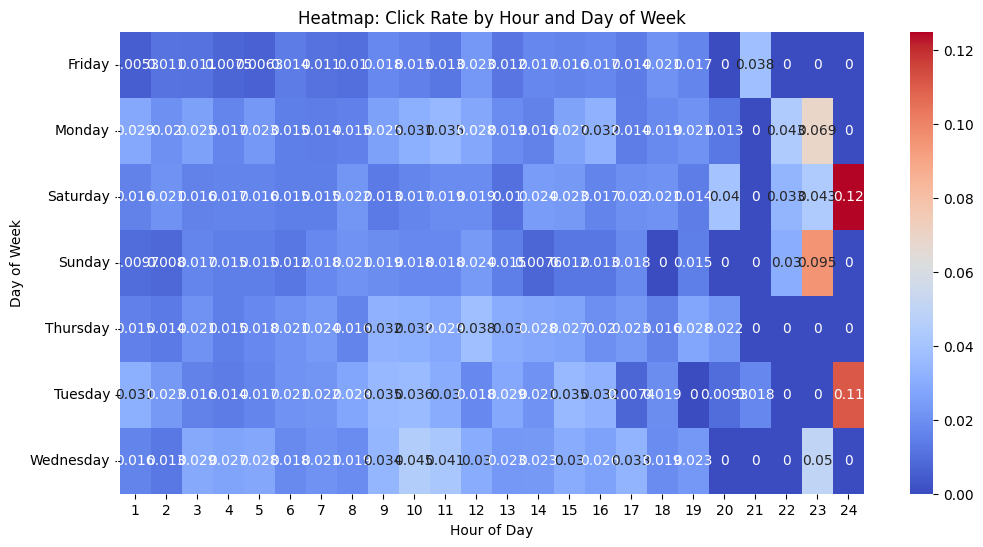

In [310]:
contingency_table_hour_day = pd.crosstab([df['hour'], df['weekday']], df['clicked'])
chi2, p, dof, expected = chi2_contingency(contingency_table_hour_day)
print(f"Chi² = {chi2:.2f}, p-value = {p:.4e}")


heatmap_data = df.pivot_table(index='weekday', columns='hour', values='clicked', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True)
plt.title("Heatmap: Click Rate by Hour and Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

In [311]:
df.drop(columns=['email_id', 'engagement_status2','clicked','opened'], inplace=True)

C:\Users\iaman\AppData\Local\Temp\ipykernel_13884\818696153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['email_id', 'engagement_status2','clicked','opened'], inplace=True)


In [312]:
df.sample(10)

,email_text,email_version,hour,weekday,user_country,user_past_purchases,target_col
27361,short_email,generic,10,Friday,US,6,none
35555,short_email,generic,9,Tuesday,FR,0,none
26040,long_email,generic,7,Friday,US,3,none
12385,long_email,generic,16,Thursday,US,11,none
26161,long_email,generic,11,Friday,US,11,none
55525,short_email,personalized,9,Tuesday,US,4,opened
12415,short_email,generic,11,Friday,FR,8,none
49639,short_email,generic,14,Wednesday,UK,0,none
64413,short_email,personalized,5,Tuesday,UK,1,none
58525,short_email,generic,1,Sunday,US,6,none


Model Training

In [313]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [314]:
x = df[['email_text', 'email_version', 'hour', 'user_past_purchases', 'user_country', 'weekday']]
y = df['target_col']

In [315]:
LabelEncoder = LabelEncoder()
y_encoded = LabelEncoder.fit_transform(y)

In [316]:
categorial_features = ['email_text', 'email_version', 'user_country', 'weekday']
numeric_features = ['hour', 'user_past_purchases']

In [317]:
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical_features', OneHotEncoder(drop = 'first'), categorial_features),
        ('numeric_features', StandardScaler(), numeric_features)]
    )

Using Logistic Regression as Base Model

In [318]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', LogisticRegression(multi_class = 'multinomial', class_weight = 'balanced', max_iter=1000, random_state=42))
    ])

In [319]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [320]:
x_train.shape
y_train.shape   

(79960,)

In [321]:
pipeline.fit(x_train, y_train)

c:\Users\iaman\anaconda3\envs\project\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_features',
                                                  OneHotEncoder(drop='first'),
                                                  ['email_text',
                                                   'email_version',
                                                   'user_country', 'weekday']),
                                                 ('numeric_features',
                                                  StandardScaler(),
                                                  ['hour',
                                                   'user_past_purchases'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    multi_class='multinomial',
                                    random_state=42))])

In [322]:
y_pred = pipeline.predict(x_test)

Evaluation of Logistic Regression Model

In [323]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=LabelEncoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        both       0.04      0.50      0.08       395
        none       0.94      0.53      0.68     18003
      opened       0.11      0.38      0.17      1592

    accuracy                           0.51     19990
   macro avg       0.37      0.47      0.31     19990
weighted avg       0.86      0.51      0.62     19990

Confusion Matrix:
[[ 199   84  112]
 [3776 9474 4753]
 [ 505  481  606]]
Accuracy Score: 0.5142071035517759
